2


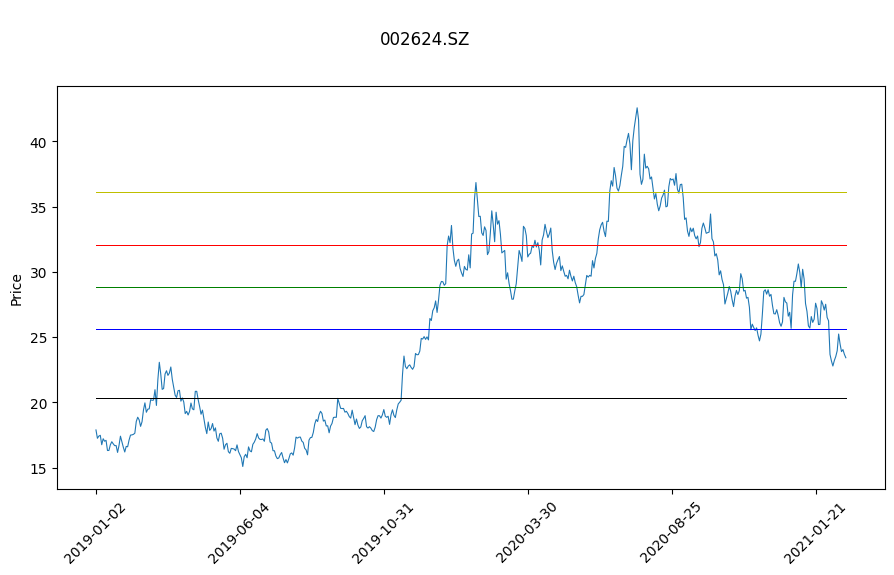

In [1]:
#https://github.com/matplotlib/mplfinance/blob/master/examples/addplot.ipynb
from xlib.astock import AStock
import talib as ta
import numpy as np 
import pandas as pd
import mplfinance as mpf
ts_code='002624.sz'
data=AStock.getStockDailyPriceByCode(ts_code,'tushare')
data=data[data['trade_date']>'20190101']
data=data[data['trade_date']<'20210301']
data['trade_date'] = pd.to_datetime(data['trade_date'], format='%Y%m%d')
data=data.set_index('trade_date')   


max=data['close'].max()
min=data['close'].min()

c_0_236=(max-min)*(1-0.236)+min
c_0_382=(max-min)*(1-0.382)+min
c_0_5=(max-min)*0.5+min
c_0_618=(max-min)*(1-0.618)+min
c_0_809=(max-min)*(1-0.809)+min

data['c_0_236']=c_0_236
data['c_0_382']=c_0_382
data['c_0_5']=c_0_5
data['c_0_618']=c_0_618
data['c_0_809']=c_0_809

alines=[
    tuple(zip(data.index, data.c_0_236)),
    tuple(zip(data.index, data.c_0_382)),
    tuple(zip(data.index, data.c_0_5)),
    tuple(zip(data.index, data.c_0_618)),
    tuple(zip(data.index, data.c_0_809))
]

lines=[max,c_0_236,c_0_382,c_0_5,c_0_618,c_0_809,min]

n=8
for v in lines:
    n=n-1
    nowclose=data.iloc[-1]['close']
    if nowclose>=v:
        print(n)
        break

        
mycolor = mpf.make_marketcolors(up='red',down='green',inherit=True)
mystyle = mpf.make_mpf_style(y_on_right=False,marketcolors=mycolor)

mpf.plot(data, 
         type='line',
         datetime_format='%Y-%m-%d',
         figratio=(20,10), 
         style=mystyle, 
         alines=dict(alines=alines,colors=['y','r','g','b','k'],linewidths=0.5),
         title=f"\n002624.SZ", 
        )

In [2]:
#https://github.com/matplotlib/mplfinance/blob/master/examples/addplot.ipynb
from xlib.astock import AStock
import talib as ta
import numpy as np 
import pandas as pd
import mplfinance as mpf


def getdata(ts_code,df_cal,start_date,end_date):
    data=AStock.getStockDailyPriceByCode(ts_code,'tushare')
    if not df_cal.empty:
        data=pd.merge(df_cal,data,on=['trade_date'],how='outer', validate="one_to_many")
    data=data[data['trade_date']>=start_date]
    data=data[data['trade_date']<=end_date]
    data['score']=0
    data['ts_code']=ts_code
    data=data.fillna(method='ffill')        
    data['date'] = data['trade_date'] 
    data['trade_date'] = pd.to_datetime(data['trade_date'], format='%Y%m%d')
    data=data.set_index('trade_date')   

    return data

In [3]:
def gann_signal(df,date,draw=True):
    end_date = pd.to_datetime(date, format='%Y%m%d')
    df2=df.loc[:end_date]
    df2=df2.dropna(subset=['close'])
    
    data=df2
    
    max=data['close'].max()
    min=data['close'].min()


    c_0_236=(max-min)*(1-0.236)+min
    c_0_382=(max-min)*(1-0.382)+min
    c_0_5=(max-min)*0.5+min
    c_0_618=(max-min)*(1-0.618)+min
    c_0_809=(max-min)*(1-0.809)+min

    data['c_0_236']=c_0_236
    data['c_0_382']=c_0_382
    data['c_0_5']=c_0_5
    data['c_0_618']=c_0_618
    data['c_0_809']=c_0_809

    alines=[
        tuple(zip(data.index, data.c_0_236)),
        tuple(zip(data.index, data.c_0_382)),
        tuple(zip(data.index, data.c_0_5)),
        tuple(zip(data.index, data.c_0_618)),
        tuple(zip(data.index, data.c_0_809))
    ]



    lines=[max,c_0_236,c_0_382,c_0_5,c_0_618,c_0_809,min]
    nowclose=data.iloc[-1]['close']
    
    n=8
    for v in lines:
        n=n-1
        if nowclose>=v:
            return n
            break


 
data=getdata('002624.sz',pd.DataFrame(),'20180101','20220415')
gann_signal(data,'20210624')
    

2

In [4]:
from xlib.mysql import mysql
import tushare as ts
db="tushare"
start_date='20190101'
end_date='20220415'
df_cal=mysql.selectToDf("select cal_date as trade_date from astock_trade_cal where is_open=1",db)
basic=mysql.selectToDf("select ts_code,industry from astock_basic",db)

pro = ts.pro_api()
df_code = pro.index_weight(index_code='000300.SH', start_date=start_date, end_date=end_date)
df_code.drop_duplicates(subset=['con_code'],keep='first',inplace=True)
 
df_all=[]
df_mean_all=[]
df_code=df_code['con_code'].to_list()


for ts_code in df_code:
    df=getdata(ts_code,df_cal,start_date,end_date)
    for date in df.index.tolist():
        try:
            score=gann_signal(df,date)
            df.at[date,'score']=score
            if score>0:
                pass
        except:
            pass
    
    
    df_all.append(df)
    print(ts_code)
df_all=pd.concat(df_all)
df_all.to_csv("./xlib/cache/fin46.csv")
df_all

603195.SH
003816.SZ
300782.SZ
601138.SH
600989.SH
601698.SH
300750.SZ
601916.SH
002938.SZ
601319.SH
603259.SH
601236.SH
300896.SZ
601865.SH
601066.SH
300759.SZ
300760.SZ
688111.SH
601990.SH
603486.SH
002916.SZ
603392.SH
600025.SH
603659.SH
603087.SH
300677.SZ
603882.SH
603260.SH
001979.SZ
300676.SZ
603233.SH
601155.SH
300628.SZ
601108.SH
300498.SZ
300595.SZ
300601.SZ
603501.SH
002841.SZ
603833.SH
603517.SH
601881.SH
300408.SZ
300413.SZ
300558.SZ
300450.SZ
603019.SH
603658.SH
002812.SZ
603939.SH
603338.SH
601966.SH
603799.SH
300433.SZ
002821.SZ
603160.SH
603986.SH
601985.SH
300529.SZ
002791.SZ
601021.SH
603369.SH
603899.SH
000333.SZ
601808.SH
601939.SH
002179.SZ
601169.SH
603806.SH
002714.SZ
002709.SZ
601238.SH
603288.SH
603993.SH
300347.SZ
300316.SZ
601231.SH
601360.SH
002157.SZ
601800.SH
601225.SH
601100.SH
300274.SZ
601669.SH
002624.SZ
002602.SZ
002607.SZ
002600.SZ
002601.SZ
002594.SZ
002568.SZ
601216.SH
002555.SZ
601799.SH
601933.SH
601211.SH
002736.SZ
000166.SZ
300144.SZ
600919.SH


,ts_code,open,high,low,close,pre_close,change,pct_chg,vol,amount,adj_factor,vwap,prev_close,returns,volume,score,date
trade_date,,,,,,,,,,,,,,,,,
2019-01-02,603195.SH,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,20190102
2019-01-03,603195.SH,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,20190103
2019-01-04,603195.SH,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,20190104
2019-01-07,603195.SH,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,20190107
2019-01-08,603195.SH,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,20190108
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-04-11,600340.SH,4.10,4.12,3.91,3.91,4.34,-0.43,-9.9078,1524629.29,601552.749,24.438,3.945567,4.34,-9.9078,1524629.29,1,20220411
2022-04-12,600340.SH,3.83,3.97,3.68,3.70,3.91,-0.21,-5.3708,1960208.44,745339.095,24.438,3.802346,3.91,-5.3708,1960208.44,1,20220412
2022-04-13,600340.SH,3.63,3.71,3.46,3.51,3.70,-0.19,-5.1351,1701577.28,608502.101,24.438,3.576106,3.70,-5.1351,1701577.28,1,20220413


In [3]:
import pandas as pd
df_all=pd.read_csv('./xlib/cache/fin46.csv',index_col=0)



df_all['date']=df_all.index
df_all['score_1']=df_all['score'].shift(1)
df_all['rank']=df_all.groupby('date')['score'].rank(method='max',ascending=False)
df_all['signal']=df_all.apply(lambda x: 1 if x['score']-x['score_1']>0  else 0 ,axis=1)
df_all.rename(columns={'ts_code':'symbol'}, inplace = True)
print(df_all)

               symbol  open  high   low  close  pre_close  change  pct_chg  \
trade_date                                                                   
2019-01-02  603195.SH   NaN   NaN   NaN    NaN        NaN     NaN      NaN   
2019-01-03  603195.SH   NaN   NaN   NaN    NaN        NaN     NaN      NaN   
2019-01-04  603195.SH   NaN   NaN   NaN    NaN        NaN     NaN      NaN   
2019-01-07  603195.SH   NaN   NaN   NaN    NaN        NaN     NaN      NaN   
2019-01-08  603195.SH   NaN   NaN   NaN    NaN        NaN     NaN      NaN   
...               ...   ...   ...   ...    ...        ...     ...      ...   
2022-04-11  600340.SH  4.10  4.12  3.91   3.91       4.34   -0.43  -9.9078   
2022-04-12  600340.SH  3.83  3.97  3.68   3.70       3.91   -0.21  -5.3708   
2022-04-13  600340.SH  3.63  3.71  3.46   3.51       3.70   -0.19  -5.1351   
2022-04-14  600340.SH  3.55  3.74  3.55   3.69       3.51    0.18   5.1282   
2022-04-15  600340.SH  3.63  3.76  3.50   3.54       3.69   -0.1

In [4]:
from xlib.strategies import Top10Strategy
from xlib import backtest
preds=df_all
returns=backtest.test(preds,Top10Strategy,hold_day=10,hold_n=10)
preds=preds[preds.signal==1]
preds.to_csv("./xlib/cache/preds46.csv")

loading datas...
runing backtest...


                           Strategy    Benchmark
-------------------------  ----------  -----------
Start Period               2019-01-02  2019-01-02
End Period                 2022-04-15  2022-04-15
Risk-Free Rate             0.0%        0.0%
Time in Market             100.0%      100.0%

Cumulative Return          38.35%      -29.22%
CAGR﹪                     10.39%      -9.99%

Sharpe                     0.75        -0.42
Smart Sharpe               0.74        -0.42
Sortino                    1.11        -0.61
Smart Sortino              1.1         -0.61
Sortino/√2                 0.79        -0.43
Smart Sortino/√2           0.78        -0.43
Omega                      1.15        1.15

Max Drawdown               -22.43%     -48.95%
Longest DD Days            407         1197
Volatility (ann.)          15.32%      20.85%
R^2                        0.51        0.51
Calmar                     0.46        -0.2
Skew                       -0.02       0.59
Kurtosis                   5.79 

None

,Start,Valley,End,Days,Max Drawdown,99% Max Drawdown
1,2020-02-26,2020-04-28,2021-02-25,365,-22.434258,-21.847680
2,2021-03-04,2022-03-15,2022-04-15,407,-20.422151,-19.726672
3,2020-01-21,2020-02-03,2020-02-07,17,-7.185530,-5.353840
4,2019-04-25,2019-05-06,2019-09-11,139,-7.098207,-6.736056
5,2019-09-12,2019-11-22,2019-12-11,90,-4.325679,-4.269887


findfont: Font family ['Arial'] not found. Falling back to DejaVu Sans.


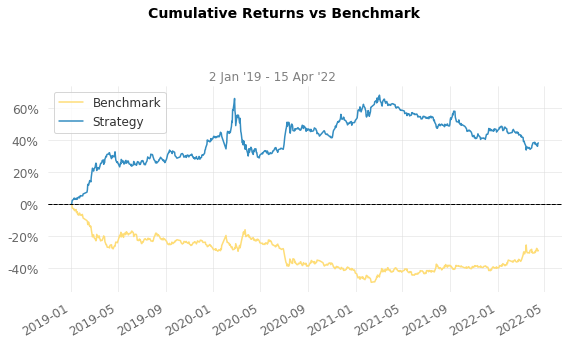

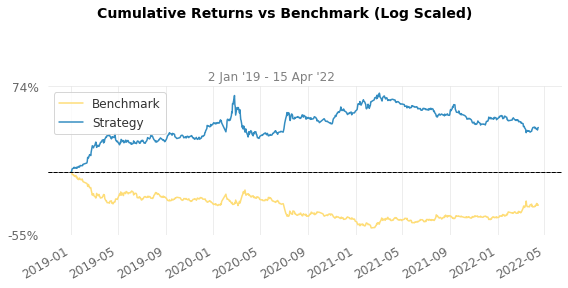

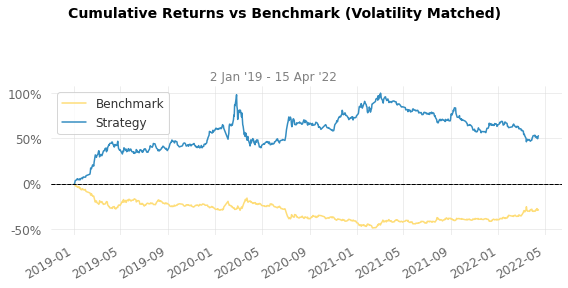

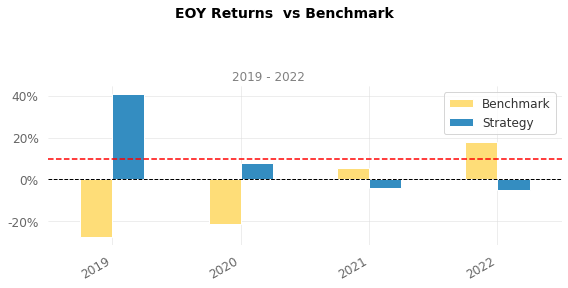

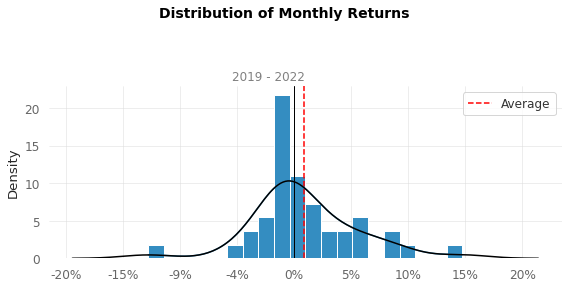

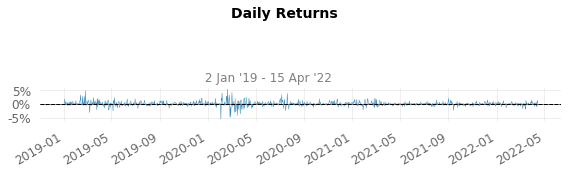

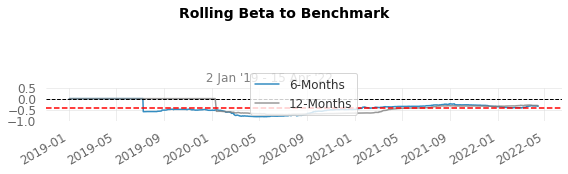

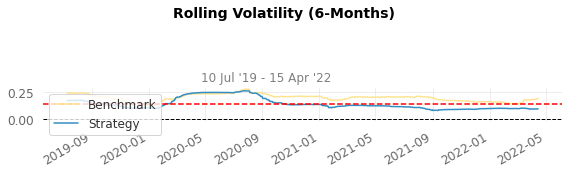

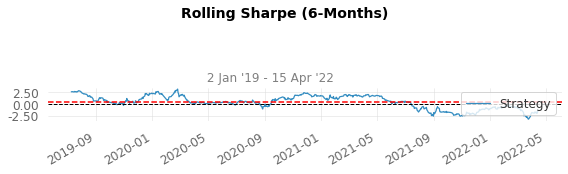

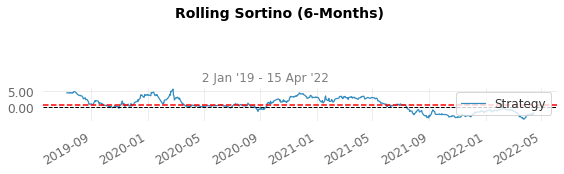

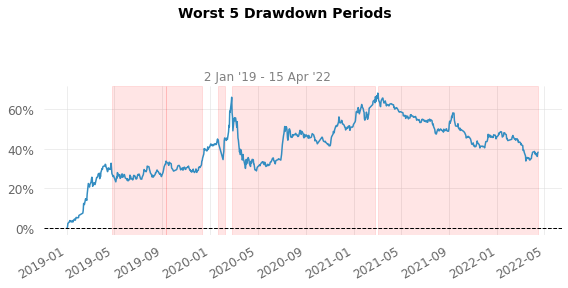

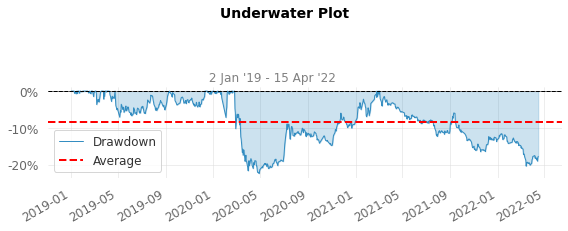

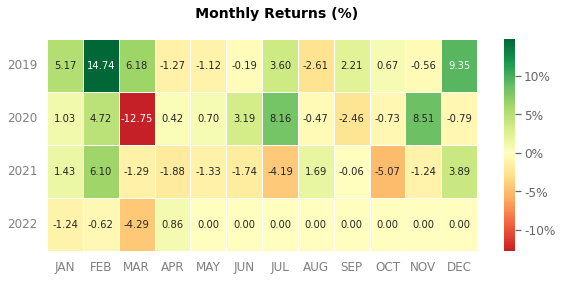

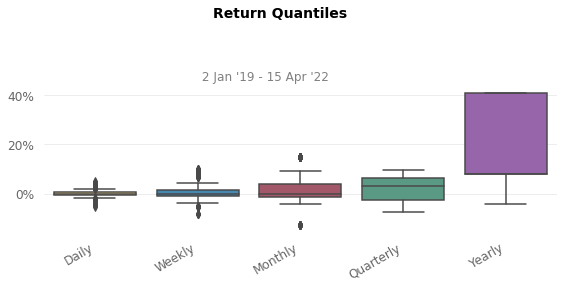

In [5]:
import akshare as ak

idx_data = ak.index_zh_a_hist(symbol='000300', period="daily", start_date='20190101', end_date='20220415')   
#print(idx_data)
idx_data.rename(columns={'日期':'date', '开盘':'open', '收盘':'close', 
                           '最高':'high', '最低':'low', '成交量':'volume',
                           '成交额':'amount', '振幅':'swing', '涨跌幅':'chg_pct',
                           '涨跌额':'chg_amount', '换手率':'turnover',
                          }, inplace = True)
idx_data['date'] = pd.to_datetime(idx_data['date'], format='%Y-%m-%d')
bench=idx_data.set_index('date')
backtest.analysis(returns,bench)

In [6]:
print(bench)
print(returns)

               open    close     high      low     volume        amount  \
date                                                                      
2019-01-02  3017.07  2969.54  3018.78  2958.49   68663022  7.610557e+10   
2019-01-03  2963.02  2964.84  3000.44  2953.25   70867103  7.666480e+10   
2019-01-04  2940.19  3035.87  3036.81  2935.83  103318971  1.071410e+11   
2019-01-07  3055.15  3054.30  3061.75  3035.91  101164360  1.057039e+11   
2019-01-08  3049.87  3047.70  3055.51  3038.53   86170586  7.962888e+10   
...             ...      ...      ...      ...        ...           ...   
2022-04-11  4203.79  4100.07  4203.79  4089.09  148197071  2.652249e+11   
2022-04-12  4102.97  4179.97  4179.97  4075.80  144285683  2.528304e+11   
2022-04-13  4154.41  4139.74  4194.04  4139.74  125097490  2.212810e+11   
2022-04-14  4172.64  4191.57  4217.06  4155.55  124791316  2.459938e+11   
2022-04-15  4162.37  4188.75  4211.32  4152.97  124762263  2.262297e+11   

            swing  chg_p